In [4]:
# Importer les bibliothèques nécessaires
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (15, 6)

# Définir les actifs du portefeuille
assets = ["GC=F", "TLT", "SPY"]

# Télécharger les données historiques des actifs
data = yf.download(assets, start="2018-09-24", end="2023-09-24")["Adj Close"]

# Calculer les rendements quotidiens des actifs sous forme de log returns
returns = np.log(data / data.shift(1))

# Calculer la matrice de covariance des log returns
cov_matrix = log_returns.cov()

print(log_returns)
print(cov_matrix)

[*********************100%%**********************]  3 of 3 completed
                GC=F       SPY       TLT
Date                                    
2018-09-24       NaN       NaN       NaN
2018-09-25  0.000583 -0.000928 -0.001028
2018-09-26 -0.005013 -0.002997  0.007003
2018-09-27 -0.009847  0.002790  0.000681
2018-09-28  0.007751  0.000103 -0.002640
...              ...       ...       ...
2023-09-18  0.004047  0.000586  0.005685
2023-09-19  0.000259 -0.002076 -0.007408
2023-09-20  0.007015 -0.009236  0.003120
2023-09-21 -0.013662 -0.016666 -0.026009
2023-09-22  0.003225 -0.002251  0.008016

[1258 rows x 3 columns]
          GC=F       SPY       TLT
GC=F  0.000096  0.000011  0.000026
SPY   0.000011  0.000185 -0.000032
TLT   0.000026 -0.000032  0.000115


In [5]:
# Définir le nombre de simulations
num_simulations = 10000

# Initialiser les listes pour stocker les résultats des simulations
portfolio_returns = []
portfolio_volatilities = []
portfolio_weights = []

# Boucler sur le nombre de simulations
for i in range(num_simulations):
    # Générer des poids aléatoires pour le portefeuille
    weights = np.random.random(len(assets))
    weights /= np.sum(weights)
    # Calculer le rendement du portefeuille
    portfolio_return = np.sum(returns.mean() * weights) * 252
    # Calculer la volatilité du portefeuille
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    # Ajouter les résultats à la liste correspondante
    portfolio_returns.append(portfolio_return)
    portfolio_volatilities.append(portfolio_volatility)
    portfolio_weights.append(weights)

# Créer un dataframe avec les résultats des simulations
portfolio_df = pd.DataFrame({"Return": portfolio_returns, "Volatility": portfolio_volatilities})

# Trouver le portefeuille avec la plus petite volatilité
min_vol_index = portfolio_df["Volatility"].idxmin() #vous pouvez changer avec un max pour voir le portefeuille avec le plus de risque
min_vol_portfolio = portfolio_df.iloc[min_vol_index]
min_vol_weights = portfolio_weights[min_vol_index]

# Afficher les caractéristiques du portefeuille avec la plus petite volatilité
print("Le portefeuille avec la plus petite volatilité sur les 5 dernières années est composé de:")
for i in range(len(assets)):
    print(f"- {assets[i]}: {min_vol_weights[i] * 100:.2f}%")
print(f"Son rendement annuel est de {min_vol_portfolio['Return'] * 100:.2f}%")
print(f"Sa volatilité annuelle est de {min_vol_portfolio['Volatility'] * 100:.2f}%")

Le portefeuille avec la plus petite volatilité sur les 5 dernières années est composé de:
- GC=F: 32.19%
- TLT: 28.82%
- SPY: 39.00%
Son rendement annuel est de 4.72%
Sa volatilité annuelle est de 10.54%


[*********************100%%**********************]  1 of 1 completed
Le rendement cumulé du S&P 500 sur les 5 dernières années est de 47.98%
Le rendement cumulé du portefeuille avec la plus petite volatilité sur les 3 dernières années est de 54.62%
Le portefeuille avec la plus petite volatilité a surperformé le S&P 500 de 6.64 points de pourcentage.


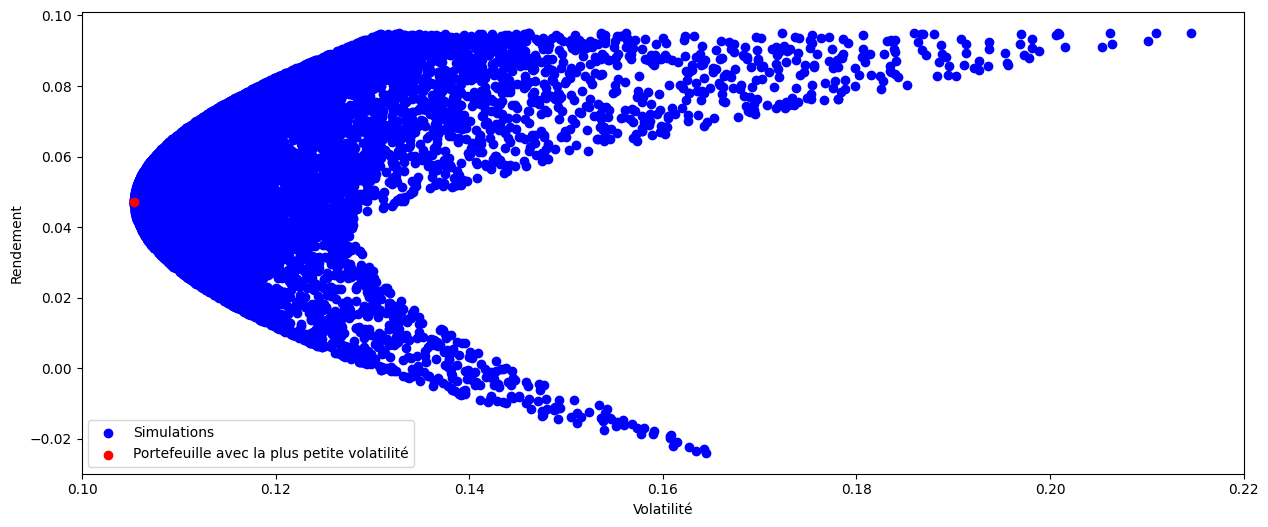

In [7]:
# Télécharger les données historiques du S&P 500
sp500_data = yf.download("^GSPC", start="2018-09-24", end="2023-09-24")["Adj Close"]

# Calculer le rendement cumulé du S&P 500 sur les 5 dernières années
sp500_return = (sp500_data.iloc[-1] - sp500_data.iloc[0]) / sp500_data.iloc[0]

# Afficher le rendement cumulé du S&P 500 sur les 5 dernières années
print(f"Le rendement cumulé du S&P 500 sur les 5 dernières années est de {sp500_return * 100:.2f}%")

# Comparer le rendement cumulé du portefeuille avec le plus petite volatilité et du S&P 500 sur les 3 dernières années
portfolio_return = (data.iloc[-1] @ min_vol_weights - data.iloc[0] @ min_vol_weights) / (data.iloc[0] @ min_vol_weights)
print(f"Le rendement cumulé du portefeuille avec la plus petite volatilité sur les 3 dernières années est de {portfolio_return * 100:.2f}%")
if portfolio_return > sp500_return:
    print(f"Le portefeuille avec la plus petite volatilité a surperformé le S&P 500 de {(portfolio_return - sp500_return) * 100:.2f} points de pourcentage.")
elif portfolio_return < sp500_return:
    print(f"Le portefeuille avec la plus petite volatilité a sous-performé le S&P 500 de {(sp500_return - portfolio_return) * 100:.2f} points de pourcentage.")
else:
    print(f"Le portefeuille avec la plus petite volatilité a eu le même rendement que le S&P 500.")

# Tracer le nuage de points des simulations avec le portefeuille avec la plus petite volatilité en rouge
plt.scatter(portfolio_df["Volatility"], portfolio_df["Return"], c="blue", label="Simulations")
plt.scatter(min_vol_portfolio["Volatility"], min_vol_portfolio["Return"], c="red", label="Portefeuille avec la plus petite volatilité")
plt.xlabel("Volatilité")
plt.ylabel("Rendement")
plt.legend()
plt.show()

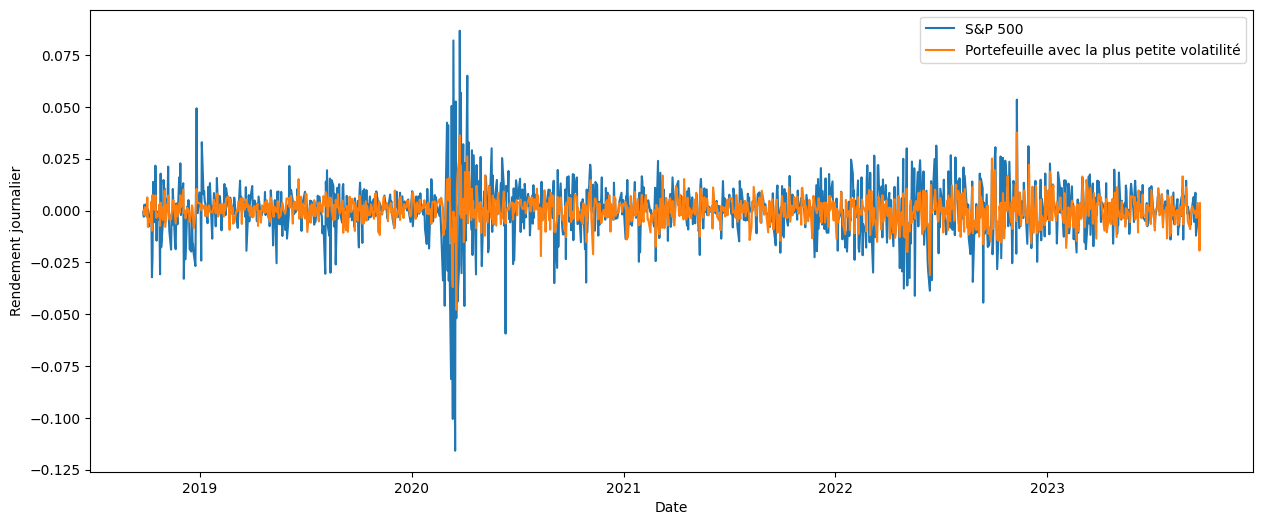

In [8]:
# Tracer le graphique des rendements journaliers du S&P 500 et du portefeuille avec la plus petite volatilité
plt.plot(returns["SPY"], label="S&P 500")
plt.plot(returns @ min_vol_weights, label="Portefeuille avec la plus petite volatilité")
plt.xlabel("Date")
plt.ylabel("Rendement journalier")
plt.legend()
plt.show()

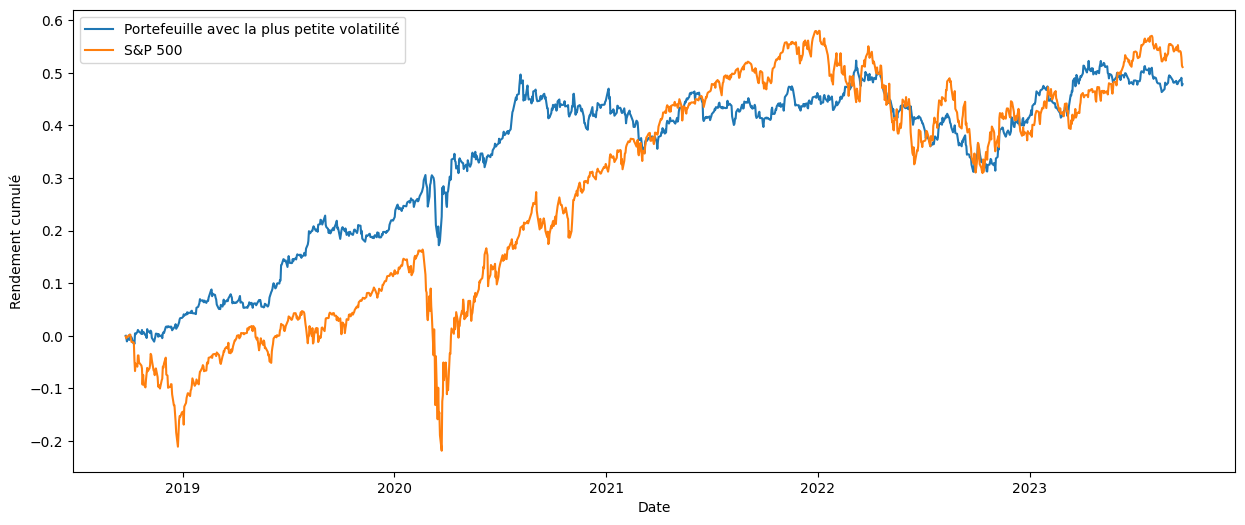

In [9]:
# Tracer le graphique du rendement cumulé du portefeuille avec la plus petite volatilité et du S&P 500 sur les 3 dernières années
portfolio_cum_return = (data @ min_vol_weights).pct_change().cumsum()
sp500_cum_return = sp500_data.pct_change().cumsum()
plt.plot(portfolio_cum_return, label="Portefeuille avec la plus petite volatilité")
plt.plot(sp500_cum_return, label="S&P 500")
plt.xlabel("Date")
plt.ylabel("Rendement cumulé")
plt.legend()
plt.show()